In [1]:
from lrnet import LRNet
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
D = pd.read_csv('iris.csv', ';')
label = 'variety'
D[label] = D[label].astype('category')

G = LRNet(D)

In [25]:
print(len(G.edges()))

781


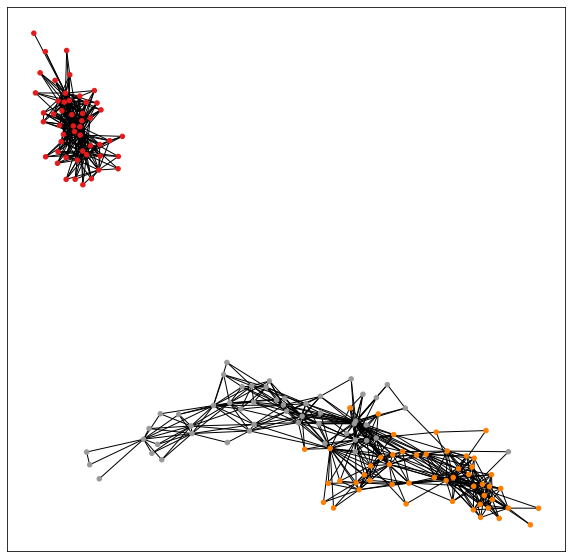

In [26]:
plt.figure(figsize=(10, 10))
labels = D[label].cat.codes
nx.draw_networkx(G, with_labels=False, node_color=labels, cmap=plt.cm.Set1, node_size=20)